# Stock Forecasting using PyFlux

### GARCH models

https://github.com/RJT1990/pyflux

In [1]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling and Forecasting
# ==============================================================================
import pyflux as pf

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Yahoo finance is used to fetch data 
# ==============================================================================
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2020-01-01' # input 
end = '2022-07-18'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3854.429932,3023830000
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,3818.800049,0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3801.780029,3166580000
2022-07-14,3763.989990,3796.409912,3721.560059,3790.379883,3790.379883,3447500000
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000


In [5]:
returns = pd.DataFrame(np.diff(np.log(df['Adj Close'].values)))
returns.index = df.index.values[1:df.index.values.shape[0]]
returns.columns = [symbol + " Returns"]

returns.head()

,^GSPC Returns
2020-01-03,-0.007085
2020-01-06,0.003527
2020-01-07,-0.002807
2020-01-08,0.004890
2020-01-09,0.006633


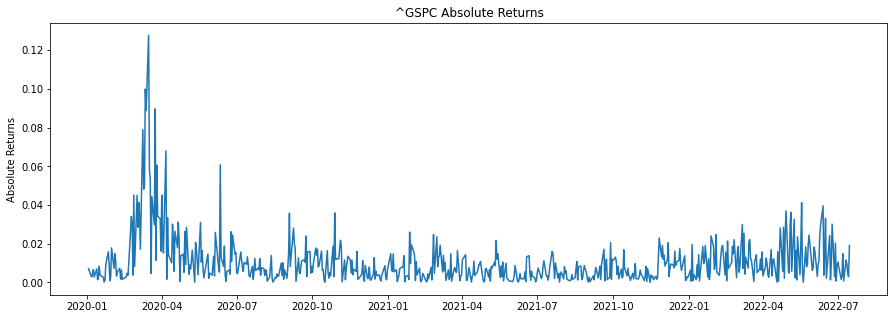

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title(symbol + ' Absolute Returns')
plt.show()

In [7]:
model = pf.GARCH(returns,p=1,q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: ^GSPC Returns                       Method: MLE                                       
Start Date: 2020-01-06 00:00:00                         Log Likelihood: 1932.3582                         
End Date: 2022-07-15 00:00:00                           AIC: -3856.7163                                   
Number of observations: 637                             BIC: -3838.8892                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

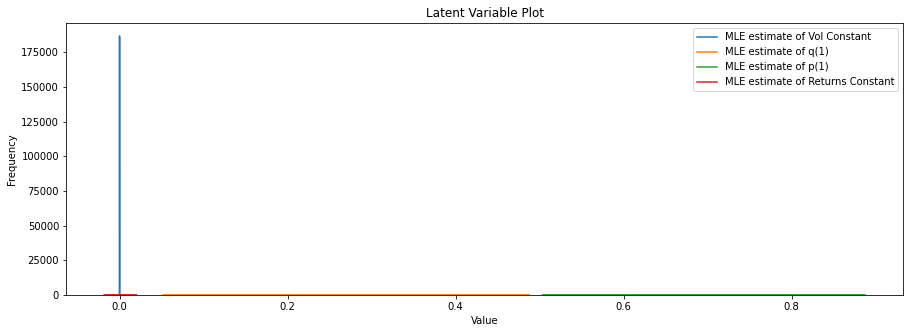

In [8]:
model.plot_z(figsize=(15,5))

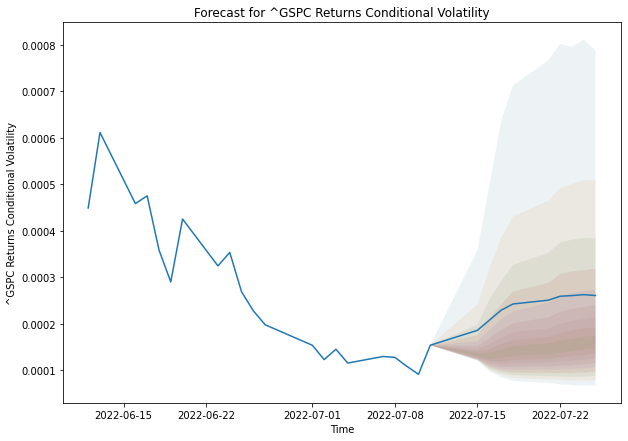

In [9]:
model.plot_predict(h=10)

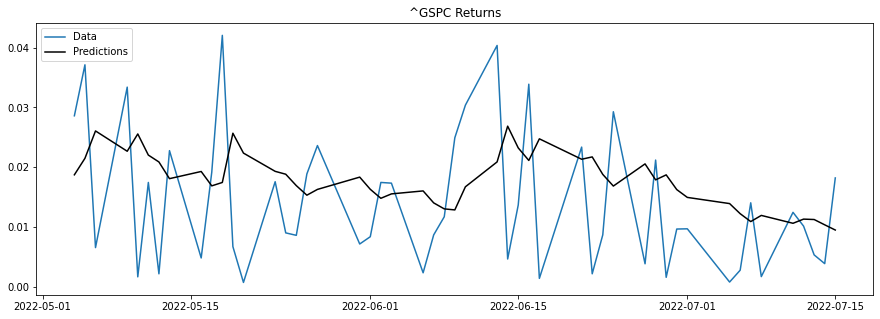

In [10]:
model.plot_predict_is(h=50,figsize=(15,5))